In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import copy
import itertools
from matplotlib import cm

import os
import seaborn as sns
from os import listdir
from os.path import isfile, join
import scipy.stats as stats

In [2]:
font = {'family' : 'Helvetica',
        'weight' : 'normal',
        'size'   : 12}

mpl.rc('font', **font)

In [16]:
csvname = 'test_maps.csv'
mypath = f'/Volumes/SAF_Data/NAYS2DH_files/Data/BarCSVs/Sp2022/Summer-redo/{csvname}'
allbars = pd.read_csv(mypath, header=0)

allbars['CVFlowDepth'] = allbars['SDFlowDepth']/allbars['MeanFlowDepth']
savefilesto = '/Volumes/SAF_Data/Colloquium22/scratch'

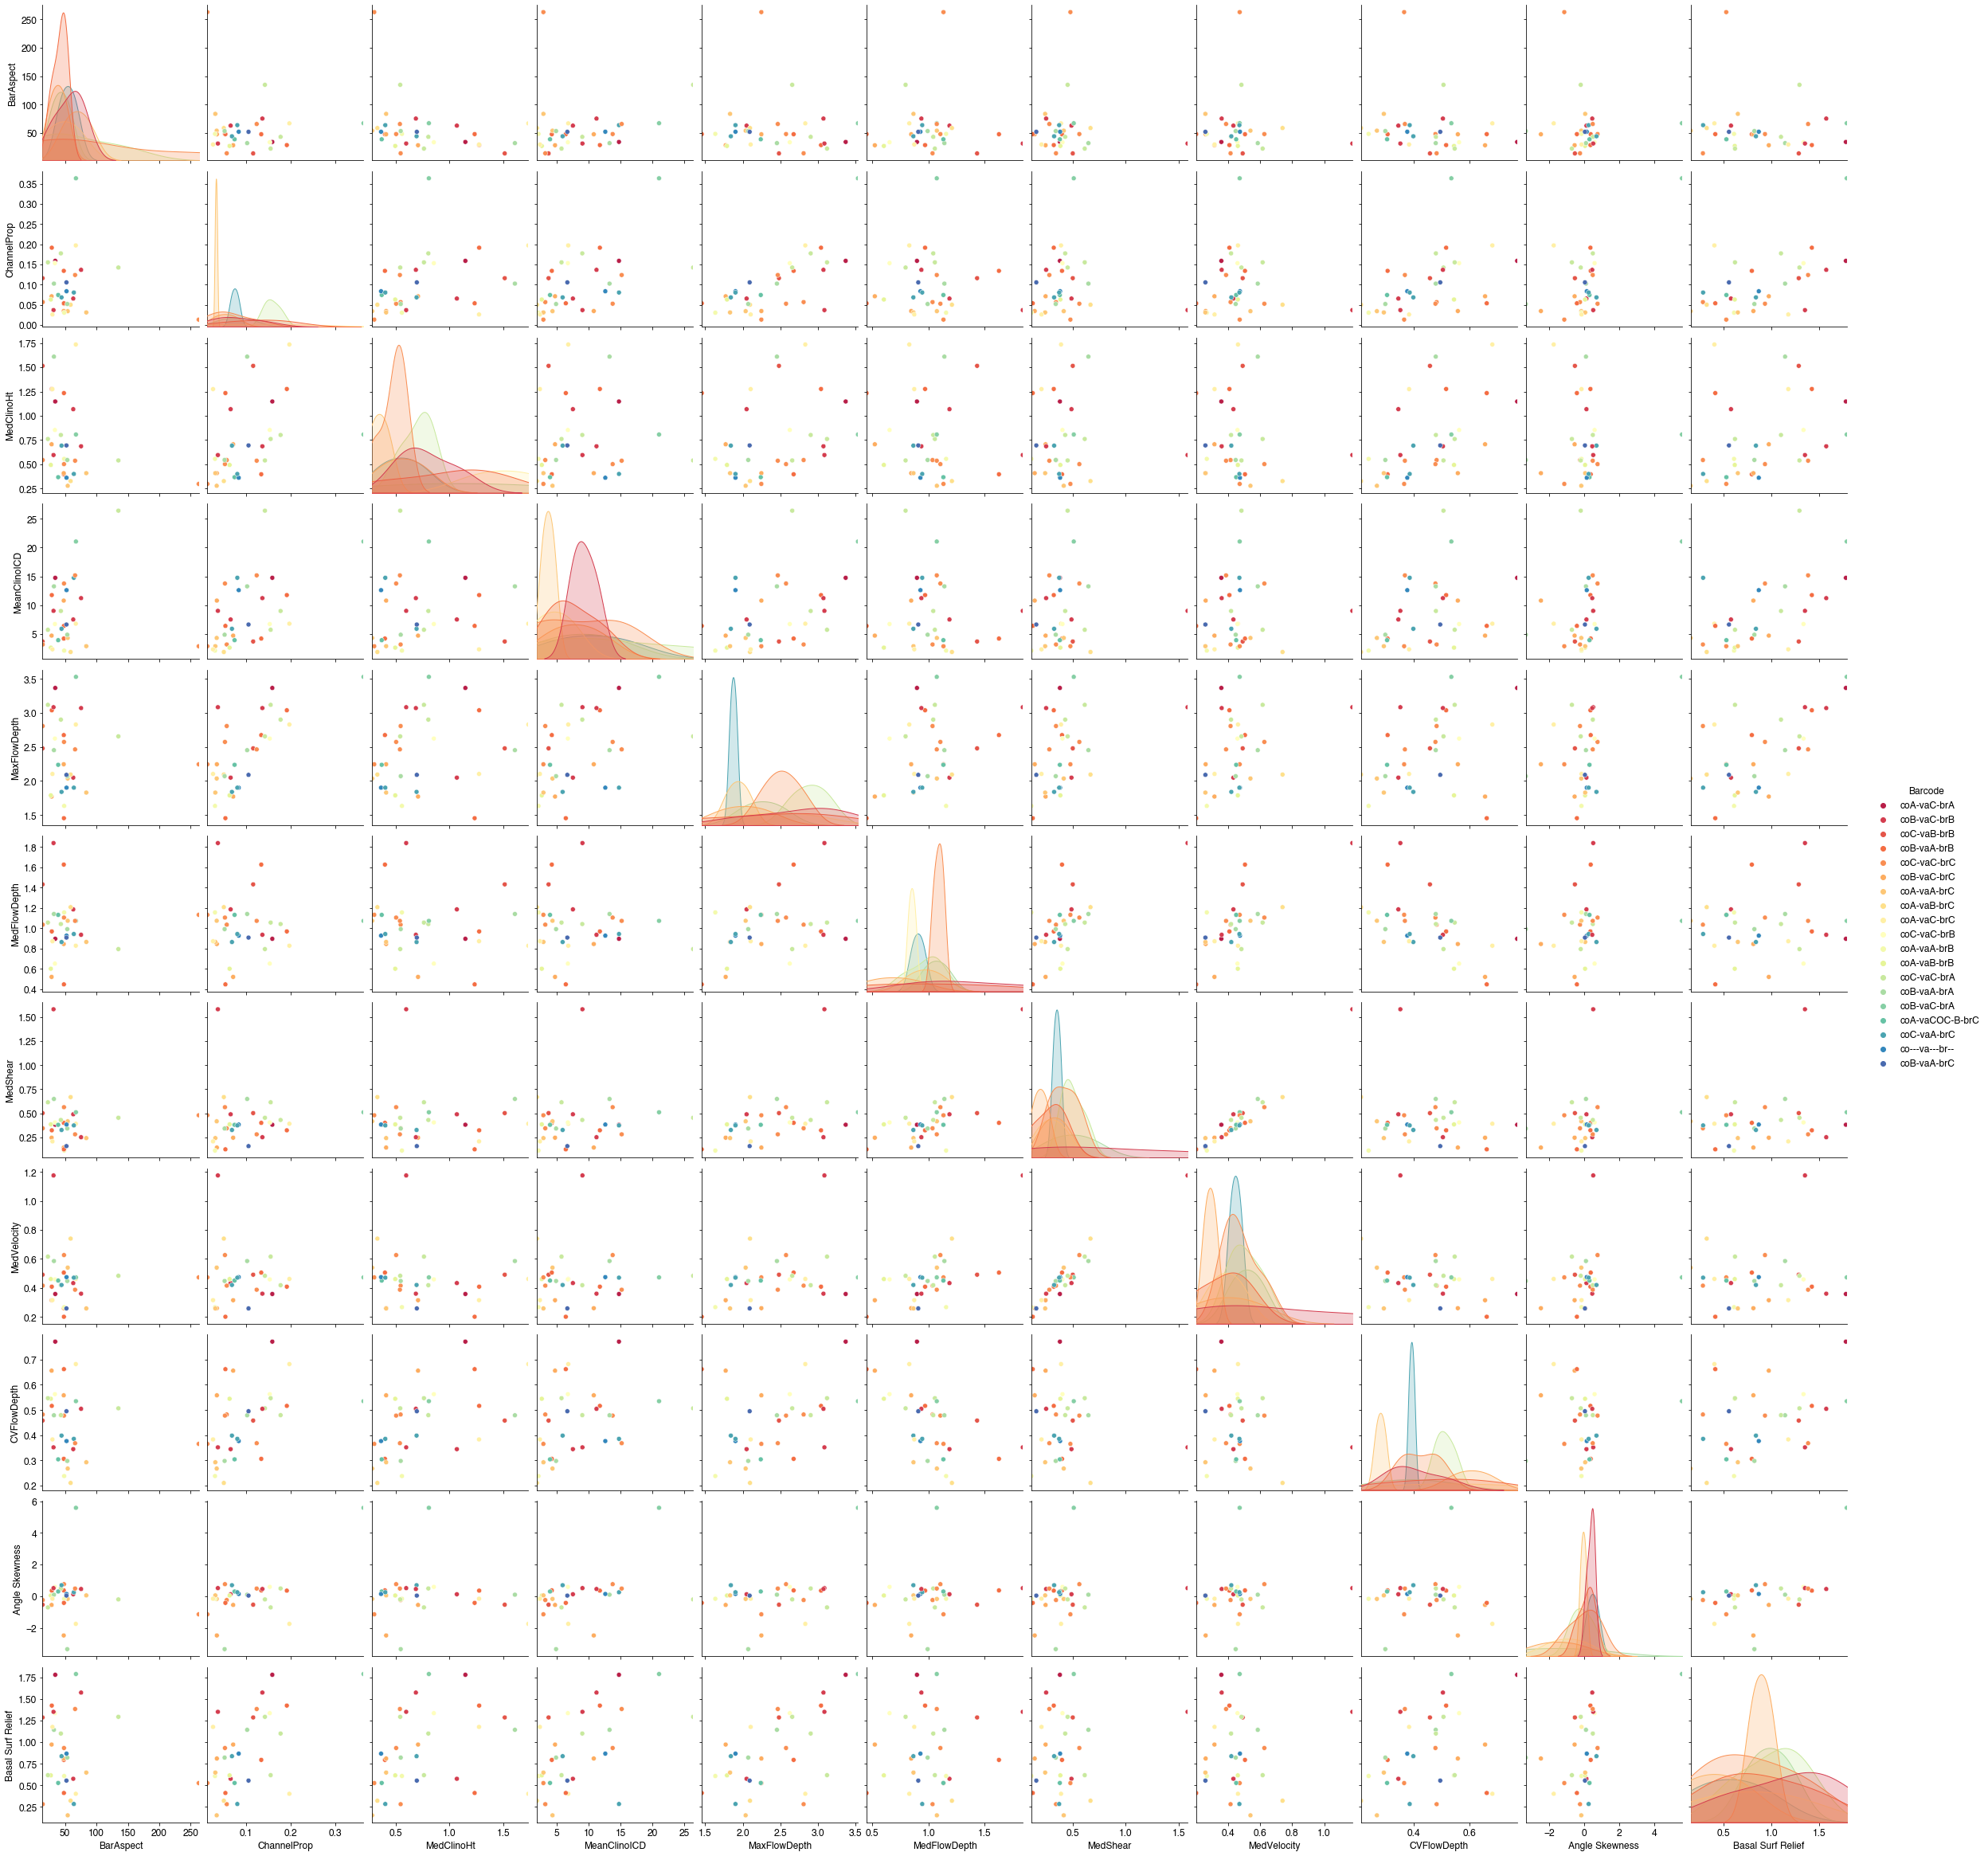

In [21]:
pplot = sns.pairplot(allbars, vars = ['BarAspect', 'ChannelProp', 'MedClinoHt', 'MeanClinoICD', 'MaxFlowDepth', 'MedFlowDepth',
                                'MedShear', 'MedVelocity', 'CVFlowDepth', 'Angle Skewness', 'Basal Surf Relief'], hue = 'Barcode', height = 3, aspect = 1, palette = 'Spectral')
snsvars = ['BarAspect', 'ChannelProp', 'MedClinoHt', 'MeanClinoICD', 'MaxFlowDepth', 'MedFlowDepth',
                                'MedShear', 'MedVelocity', 'CVFlowDepth', 'Angle Skewness', 'Basal Surf Relief']
for i, v in enumerate(snsvars):
    pplot.axes[-1, i].set(xlim=(allbars[v].min(), allbars[v].max()))

# pplot.set(xlim=(0, None))
# pplot.axes[-1, 0].set(xlim=(0, 600))
plt.savefig(f'{savefilesto}/pairplot-test.png', dpi = 200)

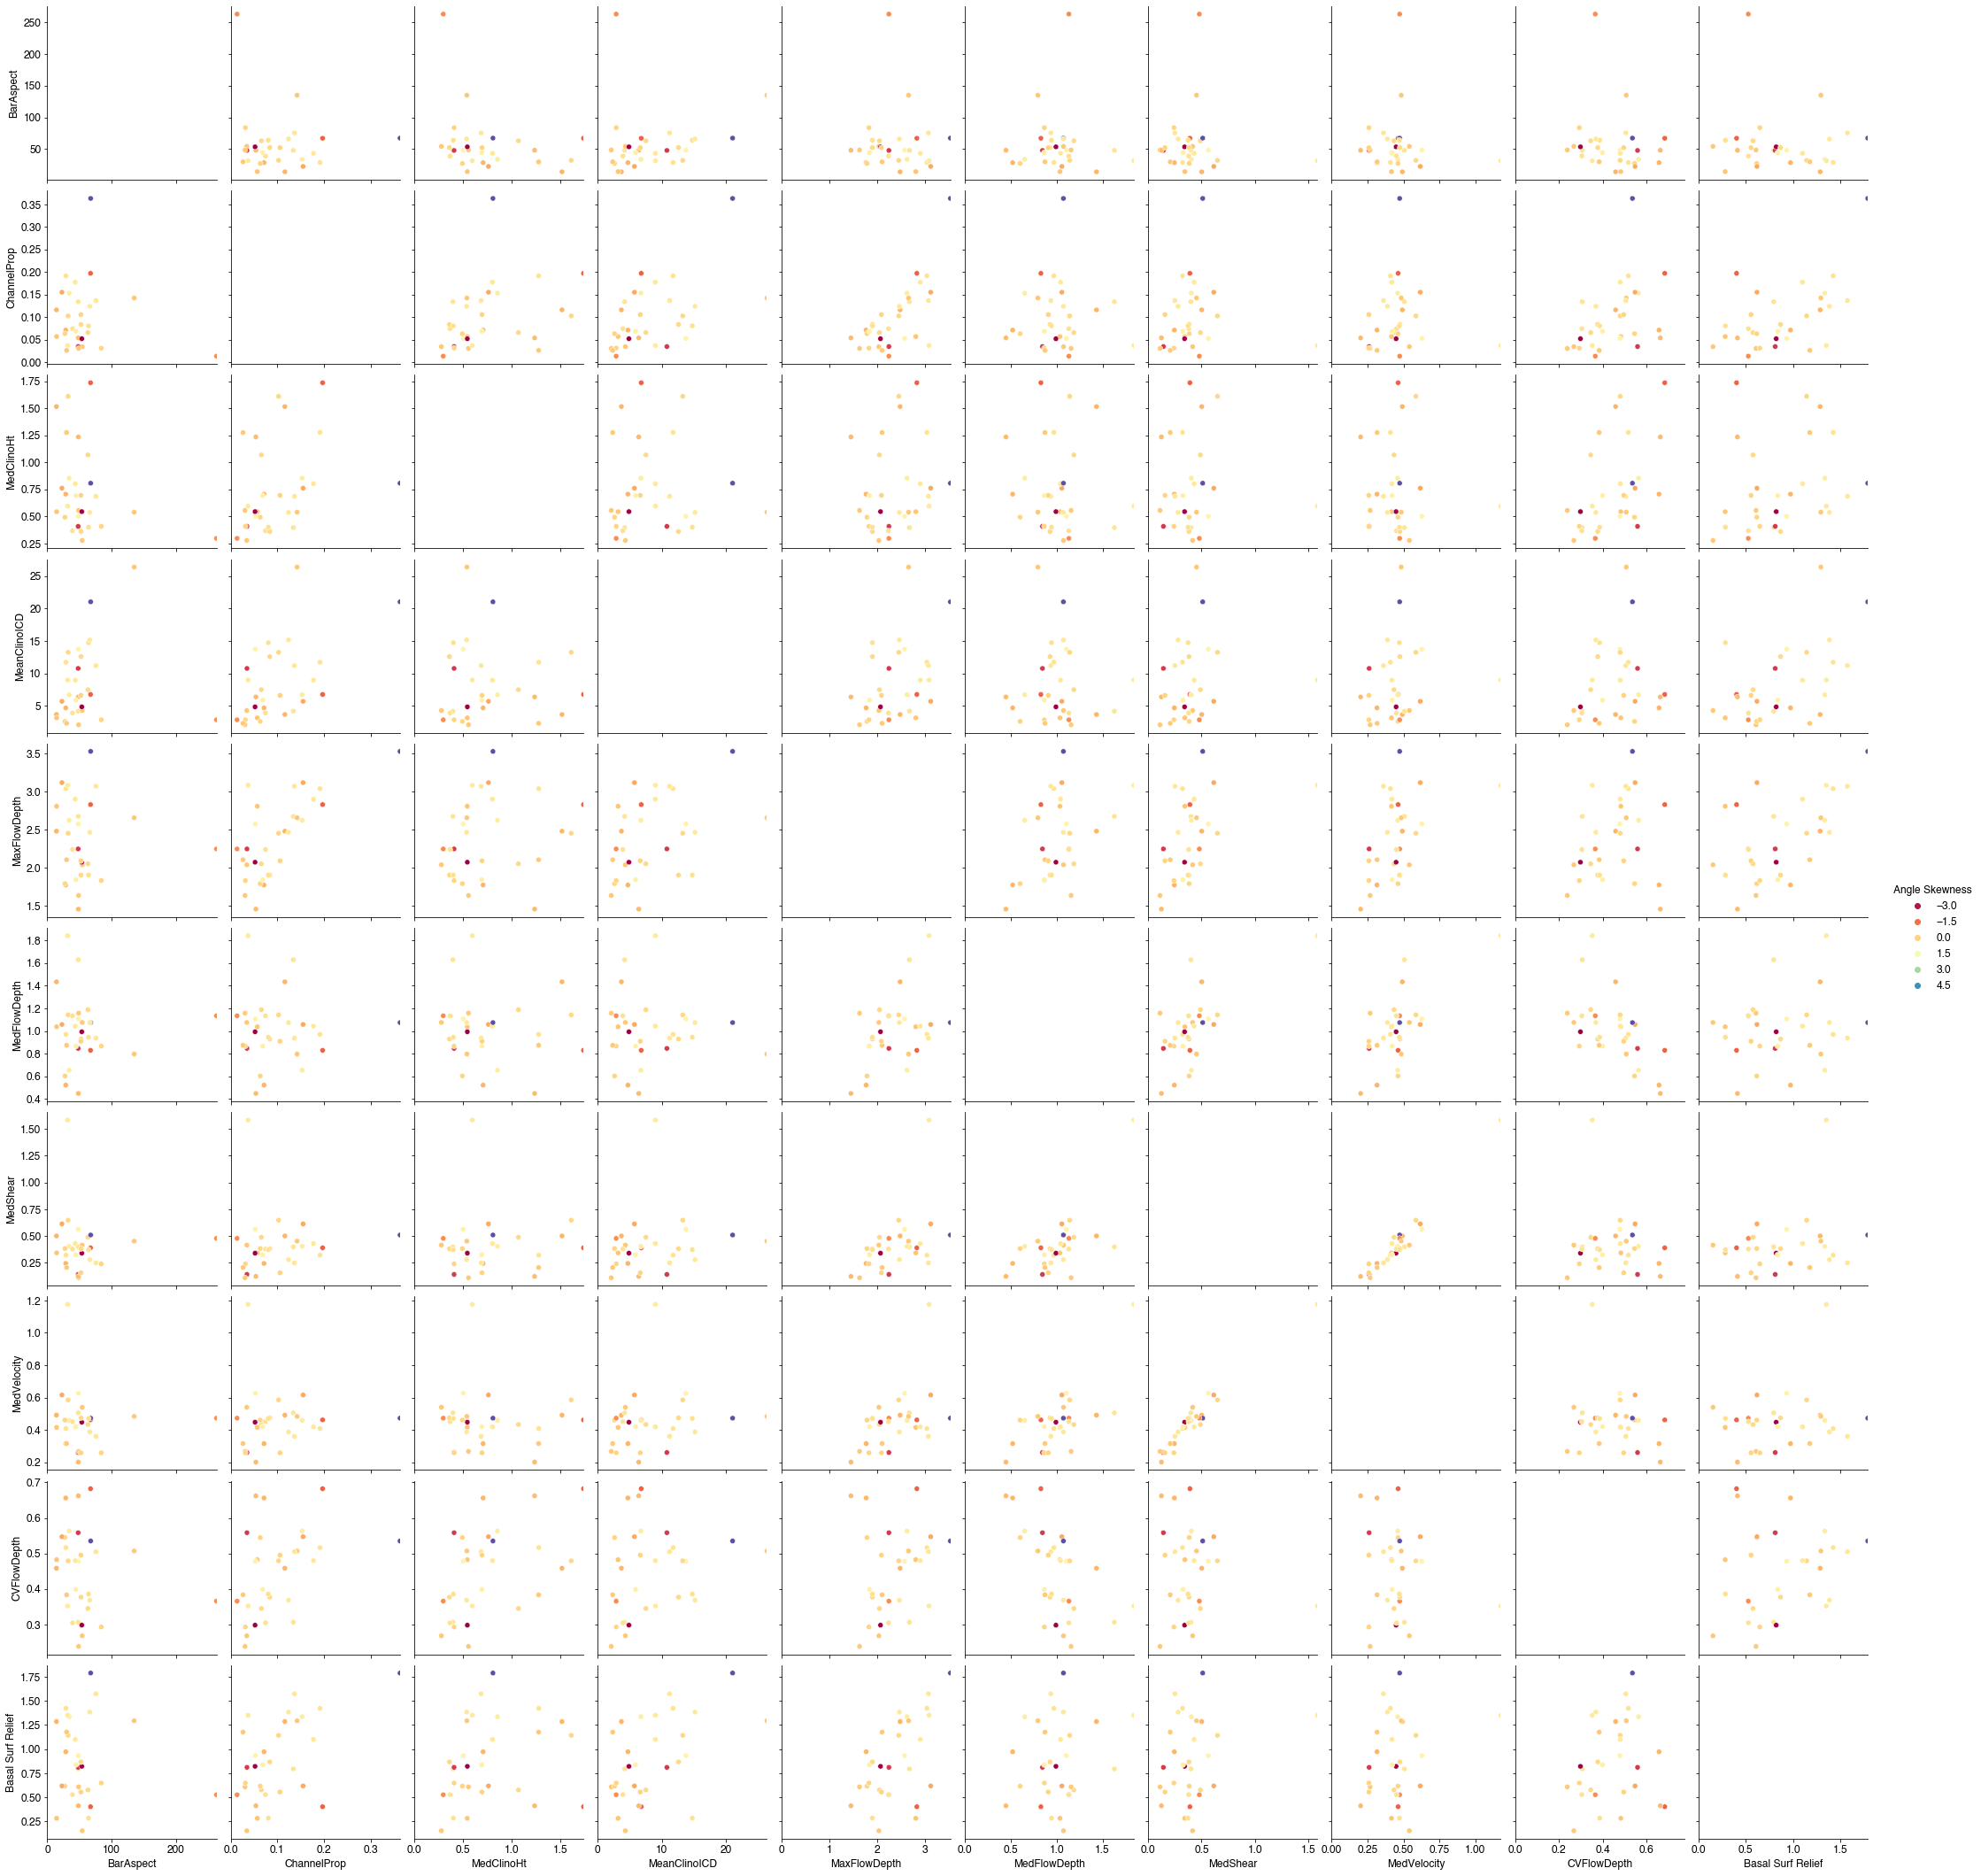

In [19]:
pplot = sns.pairplot(allbars, vars = ['BarAspect', 'ChannelProp', 'MedClinoHt', 'MeanClinoICD', 'MaxFlowDepth', 'MedFlowDepth',
                                'MedShear', 'MedVelocity', 'CVFlowDepth', 'Basal Surf Relief'], hue = 'Angle Skewness', height = 3, aspect = 1, palette = 'Spectral')
snsvars = ['BarAspect', 'ChannelProp', 'MedClinoHt', 'MeanClinoICD', 'MaxFlowDepth', 'MedFlowDepth',
                                'MedShear', 'MedVelocity', 'CVFlowDepth', 'Basal Surf Relief']
for i, v in enumerate(snsvars):
    pplot.axes[-1, i].set(xlim=(0, allbars[v].max()))
    
# pplot.set(xlim=(0, None))
# pplot.axes[-1, 0].set(xlim=(0, 600))
plt.savefig(f'{savefilesto}/pairplot-cbskew.png', dpi = 200)

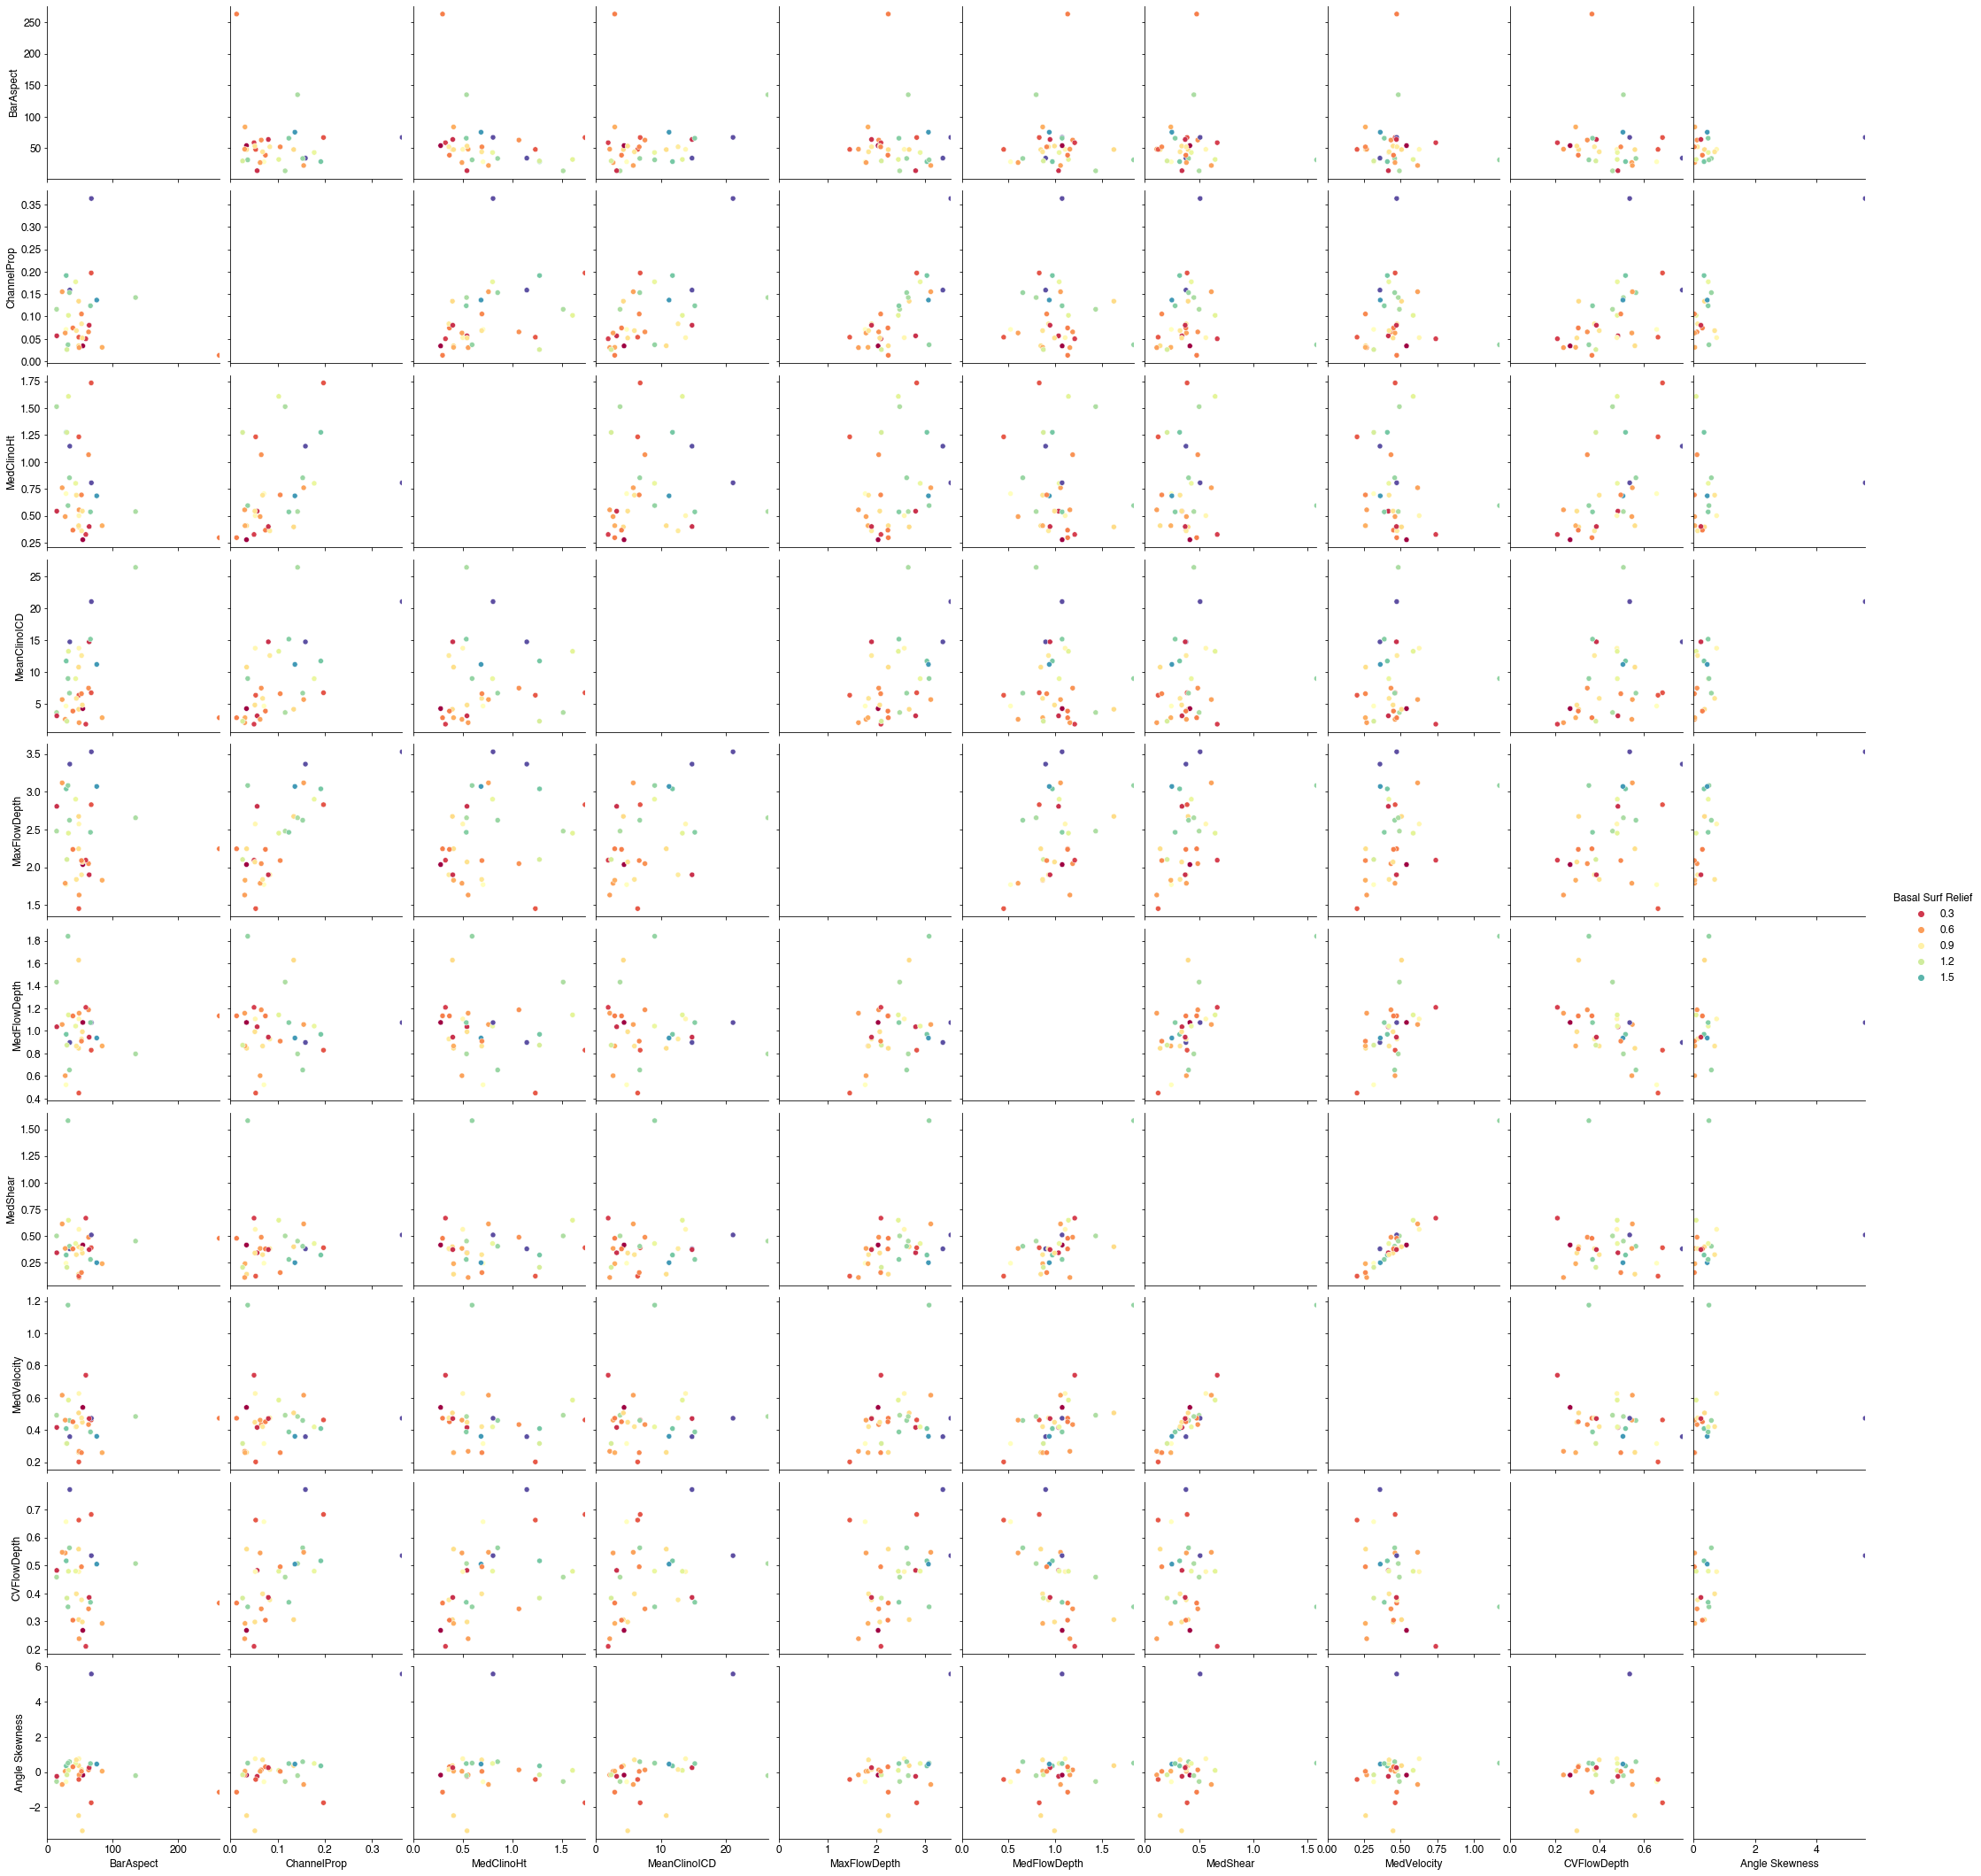

In [20]:
pplot = sns.pairplot(allbars, vars = ['BarAspect', 'ChannelProp', 'MedClinoHt', 'MeanClinoICD', 'MaxFlowDepth', 'MedFlowDepth',
                                'MedShear', 'MedVelocity', 'CVFlowDepth', 'Angle Skewness'], hue = 'Basal Surf Relief', height = 3, aspect = 1, palette = 'Spectral')
snsvars = ['BarAspect', 'ChannelProp', 'MedClinoHt', 'MeanClinoICD', 'MaxFlowDepth', 'MedFlowDepth',
                                'MedShear', 'MedVelocity', 'CVFlowDepth', 'Angle Skewness']
for i, v in enumerate(snsvars):
    pplot.axes[-1, i].set(xlim=(0, allbars[v].max()))
    
# pplot.set(xlim=(0, None))
# pplot.axes[-1, 0].set(xlim=(0, 600))
plt.savefig(f'{savefilesto}/pairplot-cbbsr.png', dpi = 200)

In [28]:
pplot = sns.pairplot(allbars, vars = ['Angle Skewness', 'Basal Surf Relief'], hue =allbars['BarHeight'], palette = 'Spectral')
plot_kws={"s": 3}

snsvars = ['Angle Skewness', 'Basal Surf Relief']
for i, v in enumerate(snsvars):
    pplot.axes[-1, i].set(xlim=(allbars[v].min(), allbars[v].max()))
    
# pplot.set(xlim=(0, None))
# pplot.axes[-1, 0].set(xlim=(0, 600))
# plt.savefig(f'{savefilesto}/pairplot-cbskew.png', dpi = 200)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().